## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combo = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata['Mouse ID'].nunique()

249

In [3]:
two = combo[['Mouse ID', 'Timepoint']]
two[two.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
dupemice = combo[combo.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dupemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
combo2 = combo.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)
combo2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
combo2['Mouse ID'].nunique()

249

## Summary Statistics

In [32]:
drugs = combo.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', np.mean),
    Median=('Tumor Volume (mm3)', np.median),
    Variance=('Tumor Volume (mm3)', np.var),
    STDEV=('Tumor Volume (mm3)', np.std),
    SEM=('Tumor Volume (mm3)', st.sem))
drugs.round(3)

C:\Users\jfkin\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\jfkin\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jfkin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

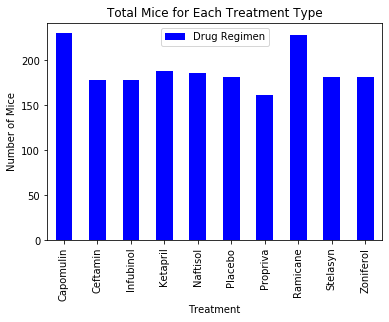

In [8]:
grouped1=combo.groupby('Drug Regimen')
grouped1count=pd.DataFrame(grouped1['Drug Regimen'].count())
barchart1=grouped1count.plot(kind='bar',color='b',alpha=1,title='Total Mice for Each Treatment Type')
barchart1.set_xlabel('Treatment')
barchart1.set_ylabel('Number of Mice')

Text(0, 0.5, 'Number of Mice')

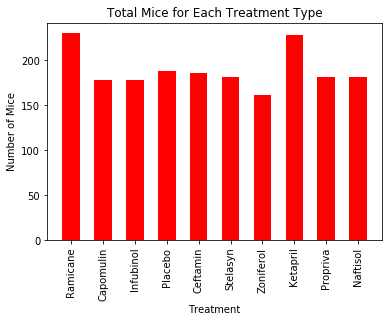

In [9]:
x=np.arange(len(grouped1count))
drugslist=combo['Drug Regimen'].unique()
ticks = [value for value in x]
plt.bar(x,grouped1count['Drug Regimen'],alpha=1,align='center',color='red',width=.55)
plt.xticks(ticks,drugslist,rotation='vertical')
plt.title('Total Mice for Each Treatment Type')
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')

Text(0, 0.5, '')

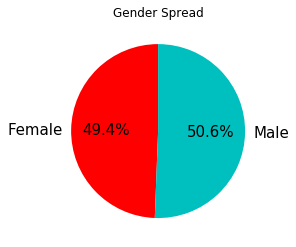

In [10]:
grouped2=combo.groupby('Sex')
grouped2count=pd.DataFrame(grouped2['Sex'].count())
piechart1=grouped2count.plot(kind='pie',y='Sex',
                             title='Gender Spread',colors=['r','c'],
                             autopct='%1.1f%%',
                             fontsize=15,
                             startangle=90,
                             legend=None)
plt.ylabel('')

C:\Users\jfkin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


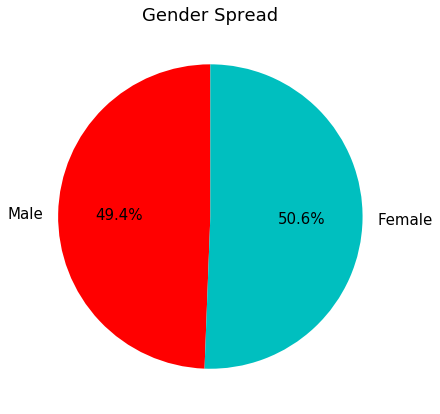

In [28]:
genderlist=combo['Sex'].unique()
plt.pie(grouped2count,
        labels=genderlist,
        startangle=90,
        colors=['r','c'],
        autopct='%1.1f%%')
plt.title("Gender Spread")
plt.rcParams['font.size']=15

## Quartiles, Outliers and Boxplots

In [12]:
druglist = ['Capomulin','Ramicane','Infubinol','Ceftamin']
drugslistdf = combo[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
finalsize=drugslistdf.groupby(['Drug Regimen','Mouse ID']).max()
finisher=finalsize.stack(level=0).unstack(level=0)

finalsize

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               45.651331
             b742               45.000000
             f966               45.000000
             g288               46.304003
             g316               46.809225
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

In [13]:
druglist2 = []
for drug in druglist:
    druglist2.append(list(finisher[drug].dropna()))

#-----------------------------------------------------------------------------------------------------------------------------#
    
counter=0
for drug in drugslist:
    quartiles = finisher[drug].quantile([.25,.5,.75]).round(3)
    lower=quartiles[.25].round(3)
    upper=quartiles[.75].round(3)
    iqr=(upper-lower)
    downbound=(lower - (1.5*iqr)).round(3)
    upbound=(upper + (1.5*iqr)).round(3)
    if counter == 0:
        print(f"-----------------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lower}")
    print(f"The upper quartile of {drug} is: {upper}")
    #print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {downbound} for {drug} could be outliers.")
    print(f"Values above {upbound} for {drug} could be outliers.")
    print(f"-----------------------------------------------------------------")
    counter += 1

-----------------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.344
The the median of Ramicane is: 45.522 
Values below 42.984 for Ramicane could be outliers.
Values above 48.36 for Ramicane could be outliers.
-----------------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.749
The the median of Capomulin is: 45.894 
Values below 42.376 for Capomulin could be outliers.
Values above 49.372 for Capomulin could be outliers.
-----------------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.049
The upper quartile of Infubinol is: 65.526
The the median of Infubinol is: 60.165 
Values below 36.834 for Infubinol could be outliers.
Values above 82.741 for Infubinol could be outliers.
------------------------------------------------

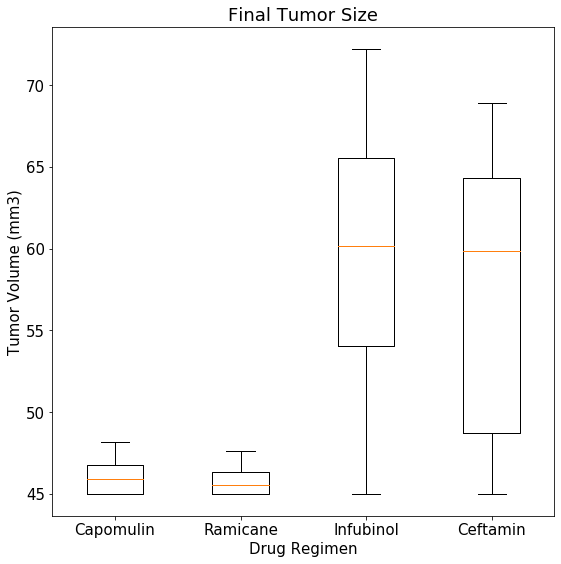

In [14]:
fig1, ax = plt.subplots(figsize=(9,9))
ax.set_title('Final Tumor Size')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(druglist2)
plt.xticks([1,2,3,4],druglist)
plt.show()

## Line and Scatter Plots

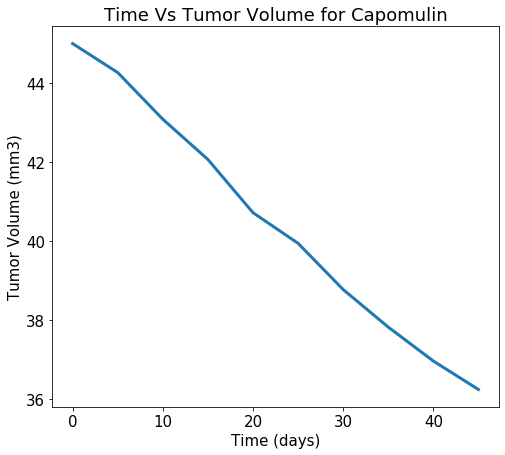

In [21]:
capomulin = combo.loc[combo['Drug Regimen'] == 'Capomulin']
tumortime = capomulin.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)',np.mean),
                                                 Tumor_Vol_SEM=('Tumor Volume (mm3)',st.sem)).round(3)
times = list(tumortime.index.values)
plt.errorbar(times,
             tumortime['Tumor_Vol_Mean'],
             label="Time Vs Tumor Volume for Capomulin",
             linewidth=3)
plt.title("Time Vs Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.rcParams["figure.figsize"] = [8,7]

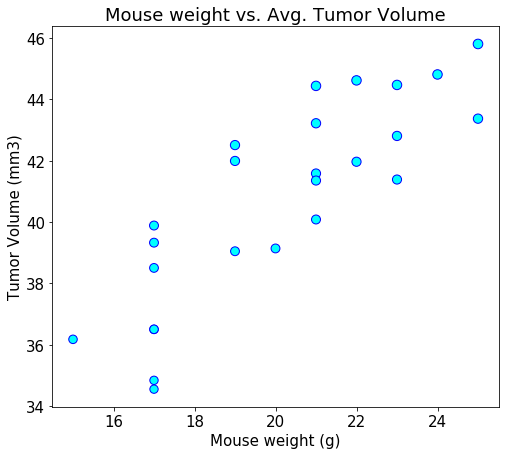

In [22]:
capscat = capomulin.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)',np.mean),
                                              Tumor_vol_mean=('Tumor Volume (mm3)',np.mean)).round(3)

plt.scatter(capscat['Mouse_weight'],
            capscat['Tumor_vol_mean'],
            marker='o',
            facecolors='cyan',
            edgecolors='blue',
            s=capscat['Tumor_vol_mean']*2,
            alpha=1)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

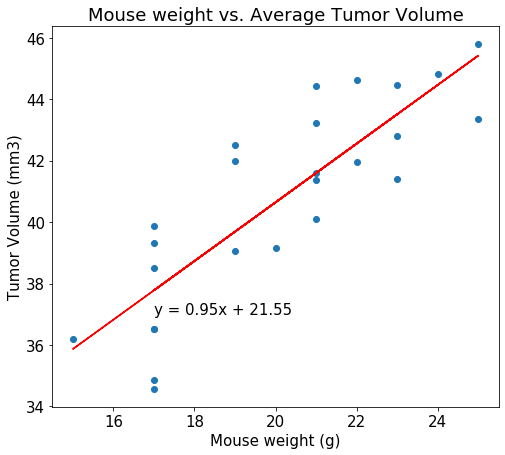

In [23]:
x_values = capscat['Mouse_weight']
y_values = capscat['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
#    Conclusions:
#    1: